# Bank Marketing Analysis

## Introduction

The datset is from a portugese banking institution. The aim was to off their clients a term deposit. This is where a client would deposit a fixed amount of money and receive interest income over an agreed upon term.

The data set and a full description of the variables can be found at [UCI](https://archive.ics.uci.edu/dataset/222/bank+marketing)

## 1.1 Import libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## 1.2 Read in csv file

In [2]:
df_csv = pd.read_csv('bank-additional-full.csv', sep=";")
df_csv.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2.1 Early Analysis

## 2.1.1 Remove economic indicies 

Economic indices may be useful for predictive analysis. The main goal for this analysis is customer segmentation.

In [3]:
df_csv.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
df = df_csv[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']]

## 2.1.2 Initial Look into Data
- Look at data types
- check for missing values
- check value counts for reponse
- look at numerical description of data

- There are no missing values
- There are 5 numerical features, 10 object (excluding response)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  campaign     41188 non-null  int64 
 12  pdays        41188 non-null  int64 
 13  previous     41188 non-null  int64 
 14  poutcome     41188 non-null  object
 15  y            41188 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.0+ MB


In [6]:
df.describe()

,age,duration,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963
std,10.42125,259.279249,2.770014,186.910907,0.494901
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


## 2.2 Correlation Analysis for Feature Selection

### 2.2.1 One-Hot Encode the Categorical Variables (excluding response)

In [7]:
df.y = df.y.map({'yes': 1, 'no': 0})

In [8]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [9]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   duration                       41188 non-null  int64
 2   campaign                       41188 non-null  int64
 3   pdays                          41188 non-null  int64
 4   previous                       41188 non-null  int64
 5   y                              41188 non-null  int64
 6   job_blue-collar                41188 non-null  bool 
 7   job_entrepreneur               41188 non-null  bool 
 8   job_housemaid                  41188 non-null  bool 
 9   job_management                 41188 non-null  bool 
 10  job_retired                    41188 non-null  bool 
 11  job_self-employed              41188 non-null  bool 
 12  job_services                   41188 non-null  bool 
 13  job_student     

### 2.2.2 Generate Correlation Plots

In [10]:
X = df_dummies.drop(columns='y')
y = df_dummies['y']

<Axes: title={'center': 'Correlation with Outcome'}, ylabel='Correlation'>

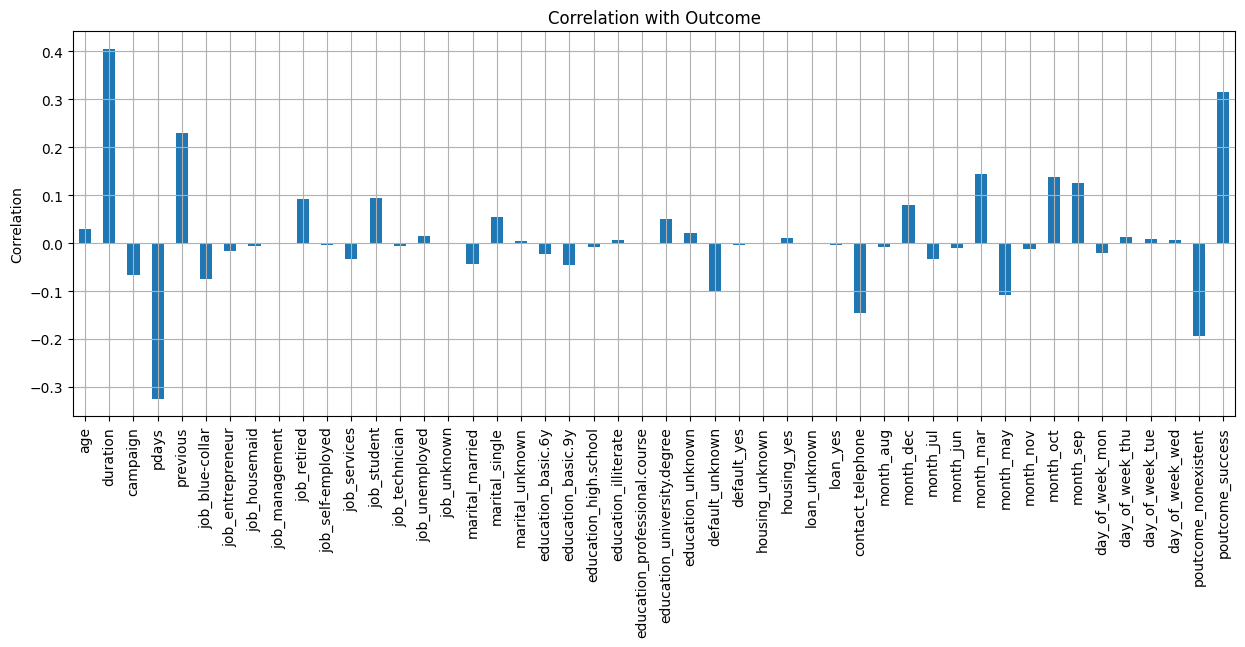

In [11]:
X.corrwith(y).plot(kind='bar', grid=True, figsize=(15, 5), title='Correlation with Outcome', ylabel='Correlation')

- The correlations dont reach above 0.5
- A lot of them are quite weak and are therefore unlikely to be informative in predicting the outcome.

<Axes: title={'center': 'Correlation with Outcome'}, ylabel='Correlation'>

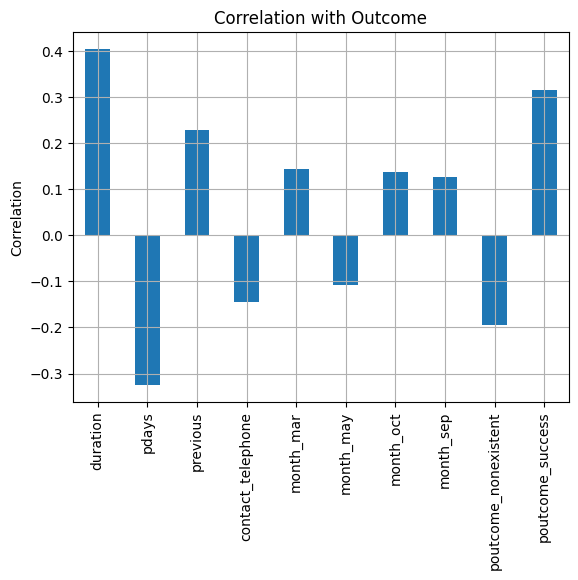

In [14]:
corr = X.corrwith(y)
notable_corr = corr[(corr > 0.1) | (corr < -0.1)]
notable_corr.plot(kind='bar', grid=True, title='Correlation with Outcome', ylabel='Correlation')

- Duration, pdays, previous, march, may, oct, sep, poutcome_nonexistent, poutcome_success have an absolute correlation with the responce higher than 0.1

- However when changing the threshold to 0.05 a few more features become useful

- These results compared to a univariate analysis may yield useful information

<Axes: title={'center': 'Correlation with Outcome'}, ylabel='Correlation'>

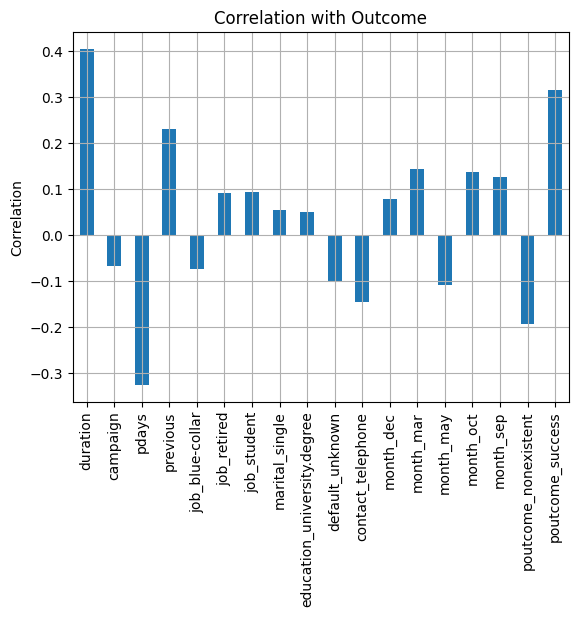

In [16]:
notable_corr = corr[(corr > 0.05) | (corr < -0.05)]
notable_corr.plot(kind='bar', grid=True, title='Correlation with Outcome', ylabel='Correlation')

## 2.3 Univariate Analysis

### 2.3.1 Prepare the functions

In [29]:
# A function to plot the features response counts per feature type for the categorical features

def categorical_plotter(df: pd.DataFrame, col: str):
    counts = df.groupby([col, 'y']).size().unstack(fill_value=0).reset_index()

    sns.barplot(x=col, y=1, data=counts, label='Yes', color='skyblue')
    sns.barplot(x=col, y=0, data=counts, label='No', color='#FF7276', bottom=counts[1])

    plt.xlabel(col.capitalize())
    plt.ylabel('Counts')
    plt.title(f'Subscription by {col.capitalize()} Type')
    plt.legend()
    plt.xticks(rotation=45)

    plt.show()


In [24]:
# Plotting the distributions of the numerical features

def numerical_plotter(df: pd.DataFrame, col: str):
    df[col].plot(kind='hist', title=col, xlabel='Value', ylabel='Frequency')
    plt.show()

In [25]:
# setup the feature lists

categorical_features = [col for col in df.columns if df[col].dtype == 'O']
numerical_features = [col for col in df.columns[:-1] if df[col].dtype == 'int64']

In [26]:
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [27]:
numerical_features

['age', 'duration', 'campaign', 'pdays', 'previous']

### 2.3.2 Numerical Univariate Analysis


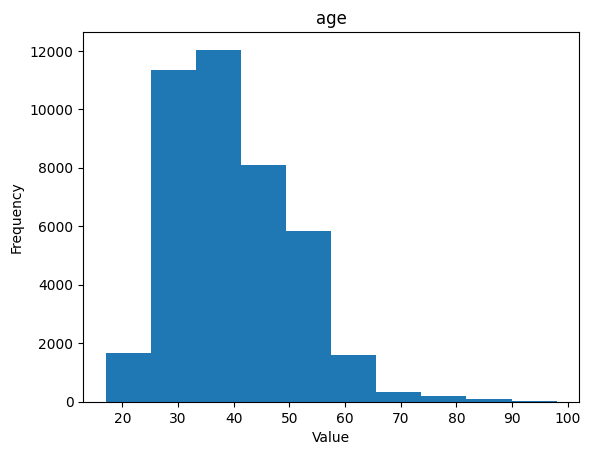

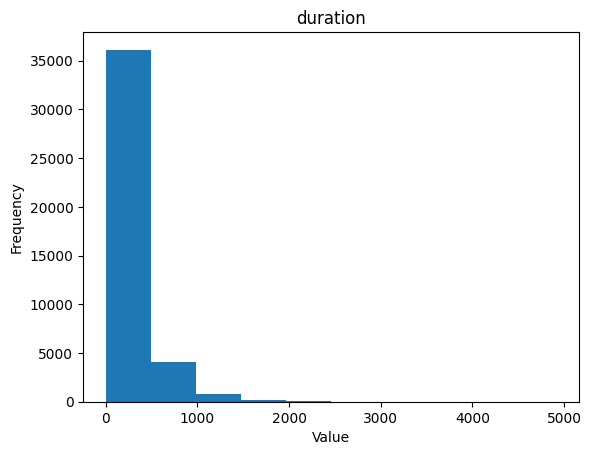

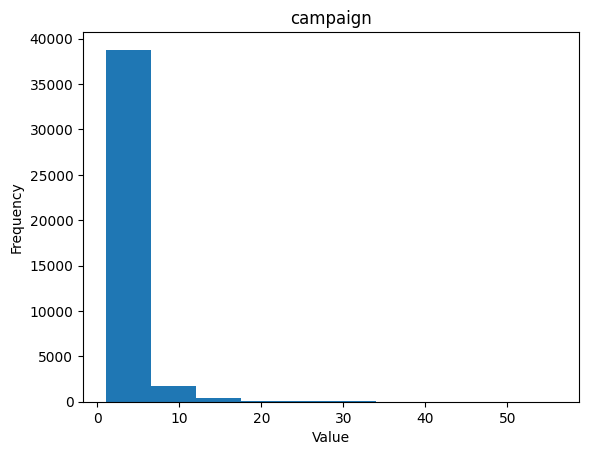

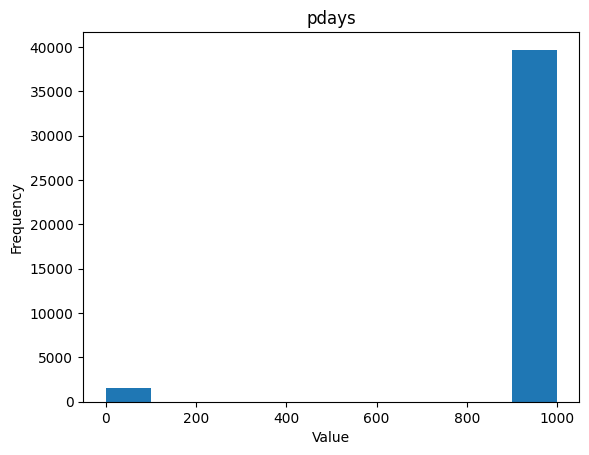

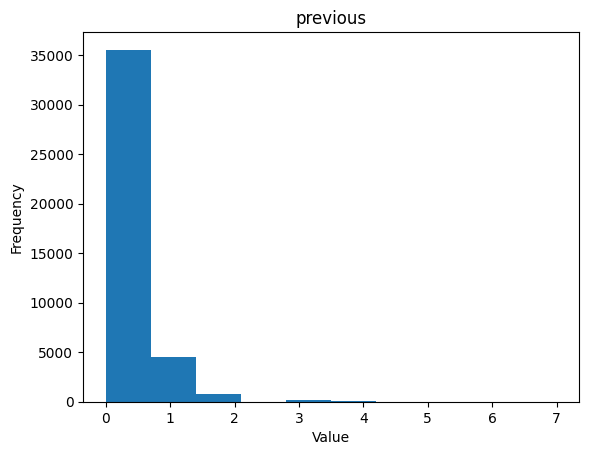

In [28]:
for col in numerical_features:
    numerical_plotter(df, col)

- The numerical faetures tend to be right skewed
- The outliers in the pdays feature comes from the encoding if people not previously contacted as 999 days.

### 2.3.3 Categorical Univariate Analysis

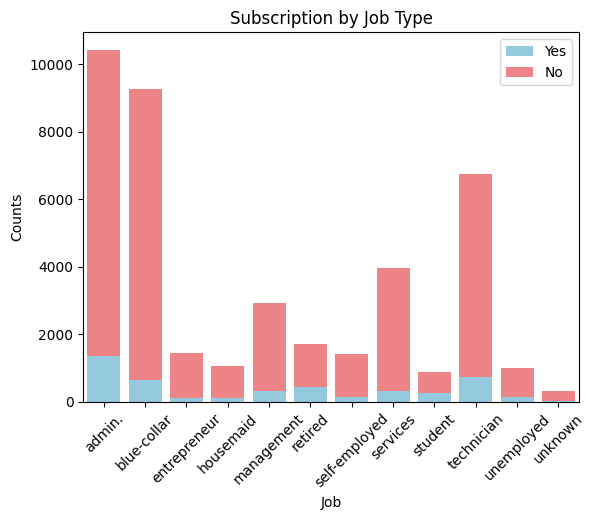

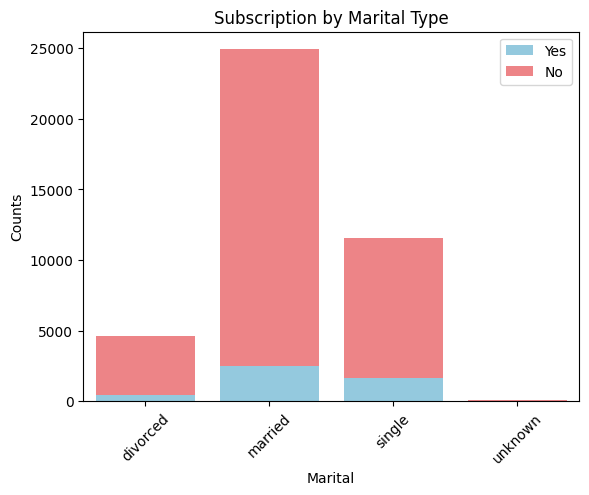

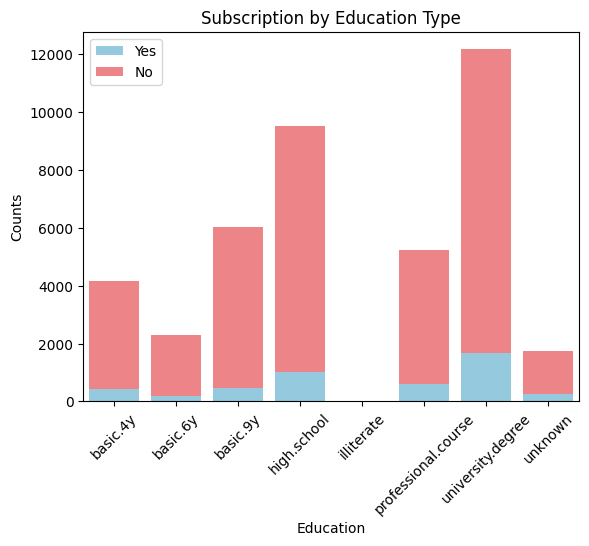

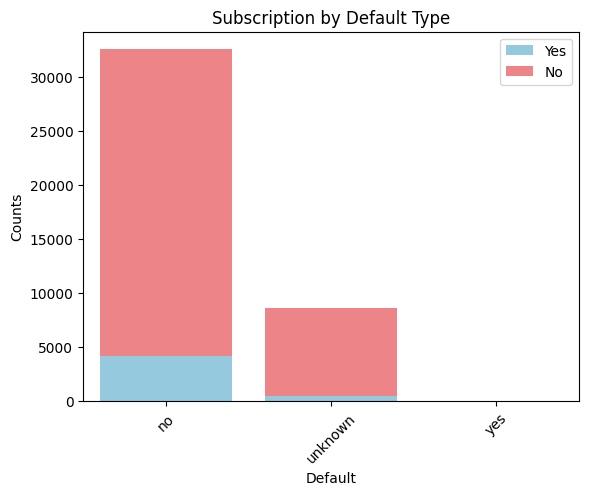

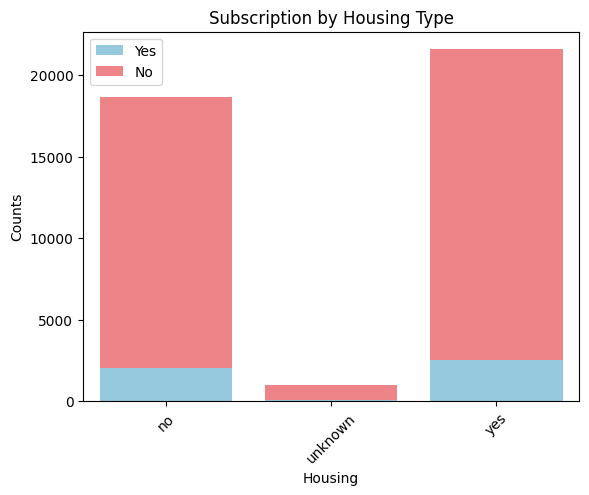

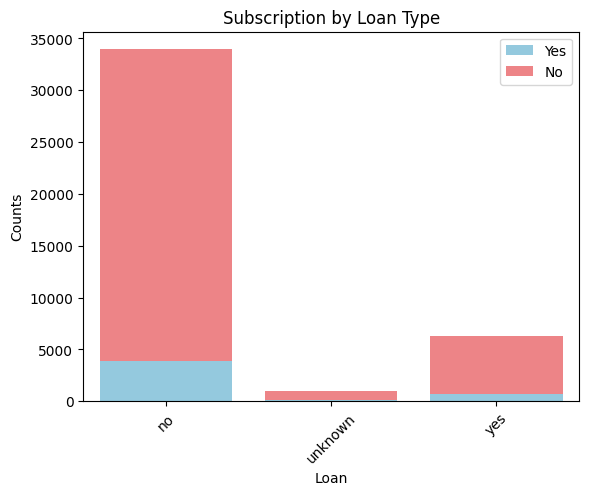

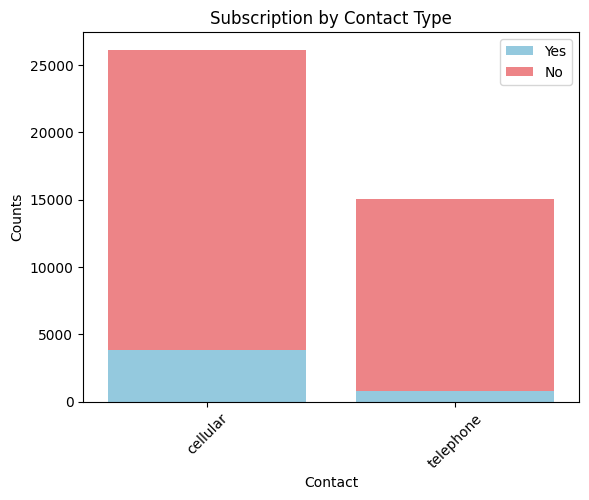

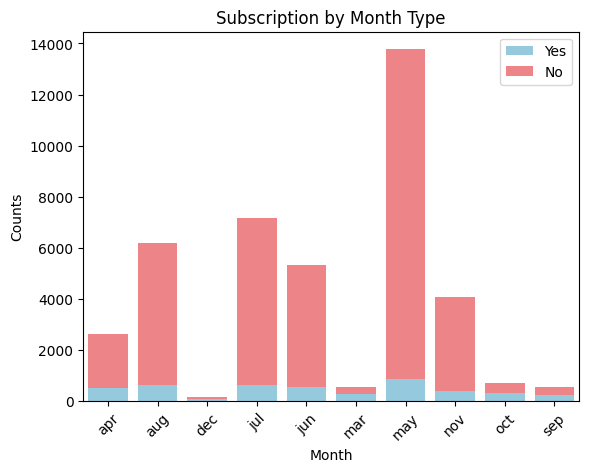

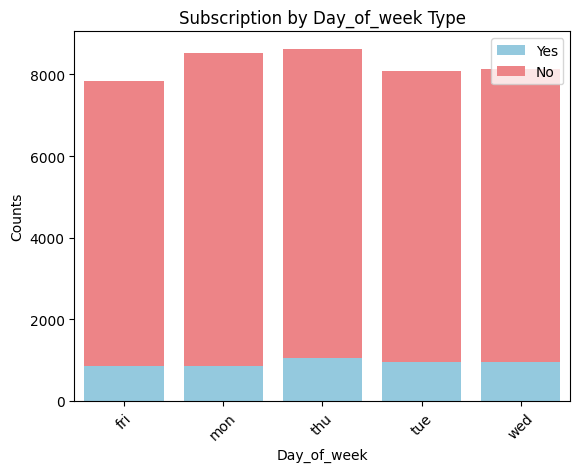

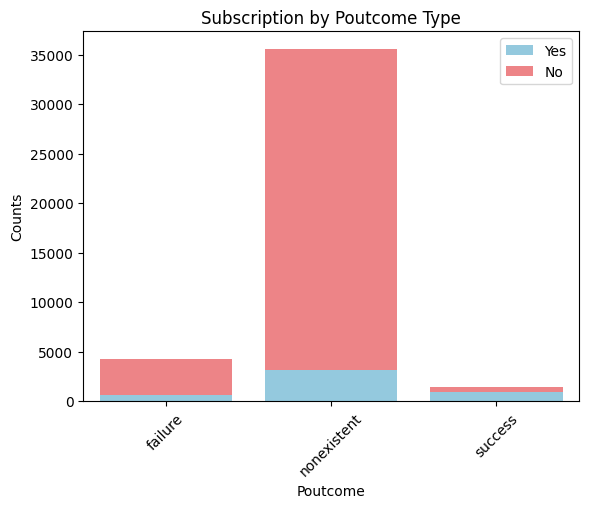

In [30]:
for col in categorical_features:
    categorical_plotter(df, col)

__Job-Type__:
- Admin, blue-collar and student and retired have high take up rates
- Student seems to be very high but has a very low volume.
- This could be a sampling bias if the students called were the ones with higher than average balances.
- It could be that with more randomised calling the take up would be close to the 11% of the entire dataset, possibly less since students are unlikely to have additional funds


__Marital Type__:
Single people have a higher take up rate 15%

__Education Type__:
Universiry degree 14%

__Contact-Type__:
Cellular 15% compared to 5% telephone

__Month__:
Wasted investment in May, low take-up rate when compared to volume 
Sep, Oct

__Poutcome__:
previous success leads to current success, however most people were'nt contacted in the last campaign. 

## 3.1 Clustering

- Clustering will be done on the most varied numerical data, Age and Duration of call

### 3.1.1 Extract columns and setup function

In [32]:
cols = ['age', 'duration']

In [33]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)
    
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

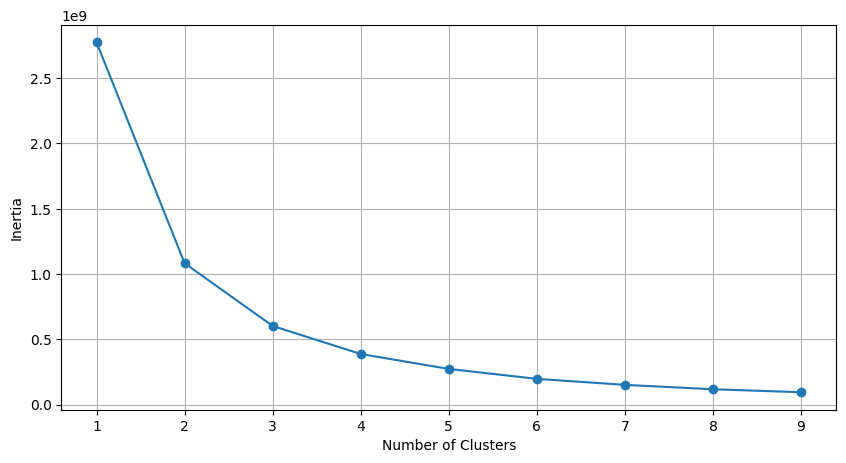

In [34]:
optimise_k_means(df[cols], 10)

- Its clear 3 or 4 clusters is best, possibly 5

### 3.1.2 3 Clusters

In [36]:
df_age_duration = df[cols]

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_age_duration)
df_age_duration['cluster_3'] = kmeans.labels_
df_age_duration.head()

,age,duration,cluster_3
0,56,261,0
1,57,149,0
2,37,226,0
3,40,151,0
4,56,307,0


Text(0, 0.5, 'Call Duration')

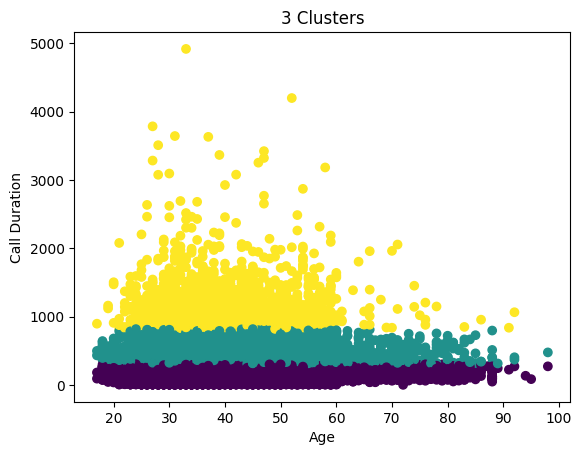

In [40]:
plt.scatter(df_age_duration['age'], df_age_duration['duration'], c=df_age_duration['cluster_3'])
plt.title('3 Clusters')
plt.xlabel('Age')
plt.ylabel('Call Duration')

### 3.1.3 4 Clusters

Text(0, 0.5, 'Call Duration')

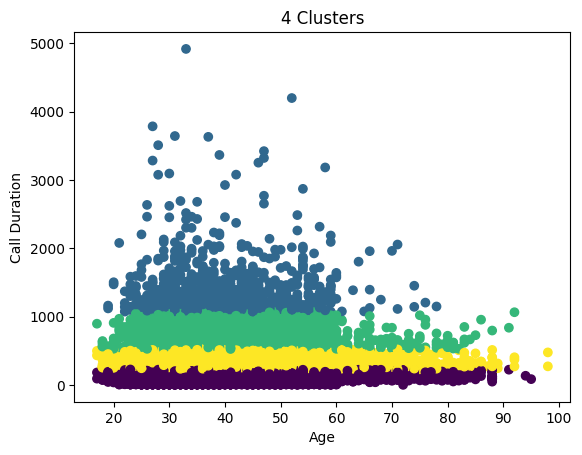

In [41]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_age_duration)
df_age_duration['cluster_4'] = kmeans.labels_

plt.scatter(df_age_duration['age'], df_age_duration['duration'], c=df_age_duration['cluster_4'])
plt.title('4 Clusters')
plt.xlabel('Age')
plt.ylabel('Call Duration')

- The clustering seems to be based just on Call duration and so clusering in this case doesnt reveal much

## 3.2 Hyperdimensional clustering

### 3.2.1 Setup

- The clusering will now be done on the most important features
    - duration
    - job_retired
    - job_blue-collar
    - marital_single
    - education_university.degree
    - month_oct
    - month_sep
    - pdays
    - previous
    - poutcome_success

- Visualisation will now be impossible

In [43]:
df_main_features = df_dummies[['duration', 'pdays', 'previous', 'month_oct', 'month_sep', 'poutcome_success', 'job_blue-collar', 'job_retired', 'marital_single', 'education_university.degree']] 

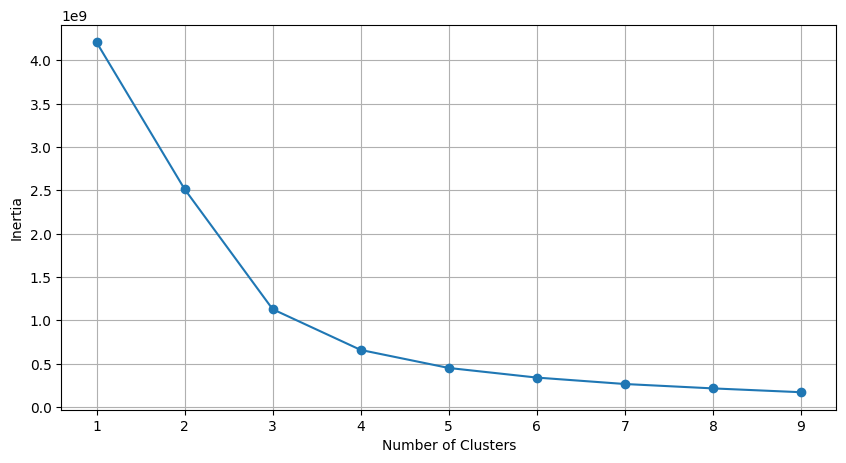

In [44]:
optimise_k_means(df_main_features, 10)

- Again 3 or 4 clusters are best

### 3.2.2 Update Original Dataframe with clusters

In [45]:
kmeans3 = KMeans(n_clusters=3)
kmeans4 = KMeans(n_clusters=4)
kmeans3.fit(df_main_features)
kmeans4.fit(df_main_features)
df['Cluster_3'] = kmeans3.labels_
df['Cluster_4'] = kmeans4.labels_

In [46]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,Cluster_3,Cluster_4
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,1,1,3
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,0,1,3
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,1,1,3
